# PLOT Ticks _ scale and labels.ipynb
# 3 different plots
* PLOT 1: Using Ticker for customized ticks & labels
* PLOT 2: Tick formatters:

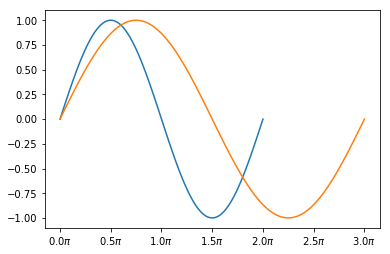

In [2]:
"""
    PLOT 1: Using Ticker for customized ticks & labels
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.ticker as ticker # this is required to used `Ticker`

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x, np.sin(x), label='') # X range: 0 to 2pi
ax.set_xticks([0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
line2, = ax.plot(1.5*x, np.sin(x), label='') # X range: 0 to 3pi


# locate ticks at every 0.5*pi
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5*np.pi)) # locate ticks at every 0.5*pi


# custome tick labels
@ticker.FuncFormatter # FuncFormatter can be used as a decorator
def major_formatter_radian(x, pos):
    return '{}$\pi$'.format(x/np.pi) # probably not the best way to show radian tick labels
ax.xaxis.set_major_formatter(major_formatter_radian)

plt.show();

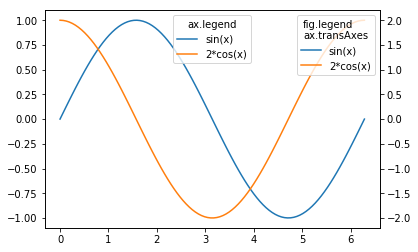

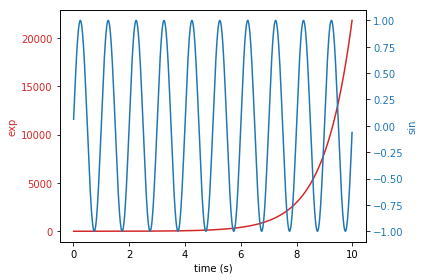

In [6]:
"""
    Example 3: Combining legends from different sources
"""

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), label='sin(x)')
ax1 = ax.twinx() # Create a twin Axes sharing the xaxis, ie second y axis on the right site 
ax1.plot(x, 2*np.cos(x), c='C1', label='2*cos(x)') 
# cf. 'CN' notation
# https://matplotlib.org/tutorials/colors/colors.html#cn-color-selection

# combined ax.legends
handler, label = ax.get_legend_handles_labels()
handler1, label1 = ax1.get_legend_handles_labels()
ax.legend(handler+handler1, label+label1, loc='upper center', title='ax.legend')
# Legend made by ax1.legend remains

# easy way with fig.legend and all handlers
fig.legend(loc='upper right', bbox_to_anchor=(1,1), 
           bbox_transform=ax.transAxes, title='fig.legend\nax.transAxes')

plt.show();

"""
    Example 3b: Using ax.twinx() to create second y axis with different scale
"""

import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

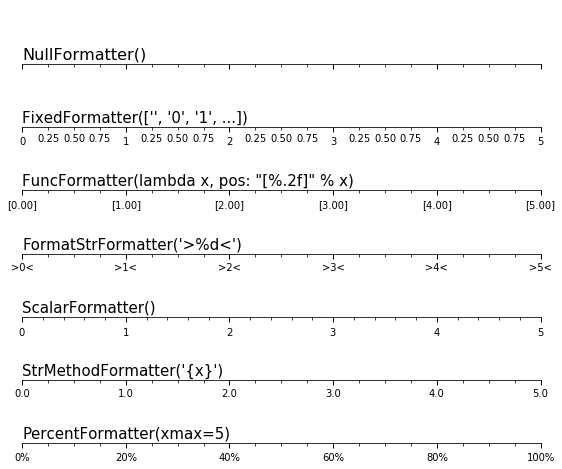

In [4]:
"""
    PLOT 2: Tick formatters:
    https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
    
"""

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


fig = plt.figure(figsize=(8, 6))
n = 7

# Null formatter
ax = fig.add_subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.0, 0.1, "NullFormatter()", fontsize=16, transform=ax.transAxes)

# Fixed formatter
ax = fig.add_subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "FixedFormatter(['', '0', '1', ...])",
        fontsize=15, transform=ax.transAxes)


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.2f]" % x


ax = fig.add_subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(major_formatter)
ax.text(0.0, 0.1, 'FuncFormatter(lambda x, pos: "[%.2f]" % x)',
        fontsize=15, transform=ax.transAxes)


# FormatStr formatter
ax = fig.add_subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
ax.text(0.0, 0.1, "FormatStrFormatter('>%d<')",
        fontsize=15, transform=ax.transAxes)

# Scalar formatter
ax = fig.add_subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ScalarFormatter()", fontsize=15, transform=ax.transAxes)

# StrMethod formatter
ax = fig.add_subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)

# Percent formatter
ax = fig.add_subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
ax.text(0.0, 0.1, "PercentFormatter(xmax=5)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

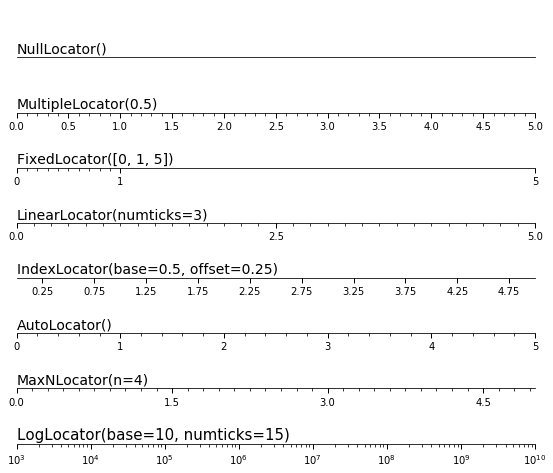

In [5]:
"""
    PLOT 3; Tick Locators
"""


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='white')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()